In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget --no-check-certificate https://storage.googleapis.com/emcassavadata/cassavaleafdata.zip  \ -O /content/cassavaleafdata.zip

--2025-03-30 11:04:43--  https://storage.googleapis.com/emcassavadata/cassavaleafdata.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1354096203 (1.3G) [application/octet-stream]
Saving to: ‘cassavaleafdata.zip’

cassavaleafdata.zip 100%[===================>]   1.26G   102MB/s    in 7.5s    

2025-03-30 11:04:51 (172 MB/s) - ‘cassavaleafdata.zip’ saved [1354096203/1354096203]

--2025-03-30 11:04:51--  http://%20-o/
Resolving  -o ( -o)... failed: Name or service not known.
wget: unable to resolve host address ‘ -o’
/content/cassavaleafdata.zip: Scheme missing.
FINISHED --2025-03-30 11:04:51--
Total wall clock time: 7.7s
Downloaded: 1 files, 1.3G in 7.5s (172 MB/s)


In [3]:
!unzip /content/cassavaleafdata.zip

Streaming output truncated to the last 5000 lines.
  inflating: cassavaleafdata/train/cgm/train-cgm-679.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-68.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-680.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-681.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-682.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-683.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-684.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-685.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-686.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-687.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-688.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-689.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-69.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-690.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-691.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-692.jpg  
  infla

In [4]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.datasets as datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import models
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.nn.init as init


torch.manual_seed(1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:

paths = {
    'train': './cassavaleafdata/train',
    'valid': './cassavaleafdata/validation',
    'test': './cassavaleafdata/test'
}

def loadImage(path):
    return Image.open(path)

img_size = 128
batch_size = 256



train_transform = transforms.Compose([
    transforms.Resize((img_size,img_size)),
    transforms.RandomCrop(128,padding=2),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.RandomRotation(5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4479, 0.4966, 0.3222],
                         std=[0.2021, 0.1998, 0.1825]),
    transforms.RandomErasing(p = 0.75,
                             scale=(0.01,0.3),
                             ratio=(1.0,1.0),
                             value=0,
                             inplace=True)

])
test_transform = transforms.Compose([
    transforms.Resize((img_size,img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4479, 0.4966, 0.3222],
                         std=[0.2021, 0.1998, 0.1825])
])


train_data = datasets.ImageFolder(
    root=paths['train'],
    loader=loadImage,
    transform=train_transform
)

valid_data = datasets.ImageFolder(
    root=paths['valid'],
    transform=test_transform
)

test_data = datasets.ImageFolder(
    root=paths['test'],
    transform=test_transform
)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)


  ##                                    TRAIN FROM SCRATCH

In [6]:
class CNNModel(nn.Module):
  def __init__ (self, n_class):
    super(CNNModel,self).__init__()

    self.conv_layer1 = nn.Sequential(
            nn.Conv2d(3, 64, 3, stride=1, padding='same'),
            nn.ReLU()
        )
    self.conv_layer2 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding='same'),
            nn.ReLU()
        )
    self.conv_layer3 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
    self.res_layer1 = nn.Sequential(
            nn.Conv2d(3, 64, 3, stride=2, padding=1),
            nn.ReLU(),
        )







    self.conv_layer4 = nn.Sequential(
            nn.Conv2d(64, 128, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
    self.conv_layer5 = nn.Sequential(
            nn.Conv2d(128, 128, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
    self.conv_layer6 = nn.Sequential(
            nn.Conv2d(128, 128, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
    self.res_layer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
        )

    self.conv_layer7 = nn.Sequential(
            nn.Conv2d(128, 256, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
    self.conv_layer8 = nn.Sequential(
            nn.Conv2d(256, 256, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
    self.conv_layer9 = nn.Sequential(
            nn.Conv2d(256, 256, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
    self.res_layer3 = nn.Sequential(
            nn.Conv2d(128, 256, 3, stride=2, padding=1),
            nn.ReLU(),
        )

    self.conv_layer10 = nn.Sequential(
            nn.Conv2d(256, 512, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
    self.conv_layer11 = nn.Sequential(
            nn.Conv2d(512, 512, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
    self.conv_layer12 = nn.Sequential(
            nn.Conv2d(512, 512, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
    self.res_layer4 = nn.Sequential(
            nn.Conv2d(256, 512, 3, stride=2, padding=1),
            nn.ReLU(),
        )

    self.flatten = nn.Flatten()


    self.dense1 = nn.Sequential(
        nn.Linear(512 * 8 * 8, 512),
        nn.SiLU()
    )
    self.dense2 = nn.Linear(512,n_class)

    self.initialize_weights()
  def initialize_weights(self):
    for m in self.modules():
      if isinstance(m,nn.Conv2d):
        init.kaiming_normal_(m.weight,nonlinearity='relu')

        if m.bias is not None:
          init.zeros_(m.bias)

      elif isinstance(m,nn.Linear):
        init.kaiming_normal_(m.weight,nonlinearity='relu')

        if m.bias is not None:
          init.zeros_(m.bias)


  def forward(self,x):
    previous_input_x = x
    x = self.conv_layer1(x)
    x = self.conv_layer2(x)
    x = self.conv_layer3(x)
    res = self.res_layer1(previous_input_x)
    x = x + res

    previous_input_x = x
    x = self.conv_layer4(x)
    x = self.conv_layer5(x)
    x = self.conv_layer6(x)
    res = self.res_layer2(previous_input_x)
    x = x + res

    previous_input_x = x
    x = self.conv_layer7(x)
    x = self.conv_layer8(x)
    x = self.conv_layer9(x)
    res = self.res_layer3(previous_input_x)
    x = x + res

    previous_input_x = x
    x = self.conv_layer10(x)
    x = self.conv_layer11(x)
    x = self.conv_layer12(x)
    res = self.res_layer4(previous_input_x)
    x = x + res

    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    return x

In [7]:
model = CNNModel(5)
model.to(device)
summary(model, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           1,792
              ReLU-2         [-1, 64, 128, 128]               0
            Conv2d-3         [-1, 64, 128, 128]          36,928
              ReLU-4         [-1, 64, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          36,928
              ReLU-6         [-1, 64, 128, 128]               0
         MaxPool2d-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]           1,792
              ReLU-9           [-1, 64, 64, 64]               0
           Conv2d-10          [-1, 128, 64, 64]          73,856
             ReLU-11          [-1, 128, 64, 64]               0
           Conv2d-12          [-1, 128, 64, 64]         147,584
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 128,

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5)
decay_Rate = 0.96
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer,gamma=decay_Rate)

In [9]:
# Function to compute loss and accuracy for test set
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    running_correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            running_correct += (predicted == labels).sum().item()

    accuracy = 100 * running_correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy

In [10]:
# some parameter
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
max_epoch = 100

In [11]:
# train
for epoch in range(max_epoch):
    model.train()
    running_loss = 0.0
    running_correct = 0   # to track number of correct predictions
    total = 0             # to track total number of samples

    for i, (inputs, labels) in enumerate(train_loader, 0):
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)

    test_loss, test_accuracy = evaluate(model, test_loader, criterion)
    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # save for plot
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/100], Loss: 83.0049, Accuracy: 40.17%, Test Loss: 1.4746, Test Accuracy: 47.00%
Epoch [2/100], Loss: 1.3599, Accuracy: 47.08%, Test Loss: 1.4684, Test Accuracy: 47.11%
Epoch [3/100], Loss: 1.3456, Accuracy: 47.12%, Test Loss: 1.4544, Test Accuracy: 47.37%
Epoch [4/100], Loss: 1.3189, Accuracy: 47.70%, Test Loss: 1.4012, Test Accuracy: 51.56%
Epoch [5/100], Loss: 1.2849, Accuracy: 50.58%, Test Loss: 1.4223, Test Accuracy: 51.83%
Epoch [6/100], Loss: 1.2661, Accuracy: 51.41%, Test Loss: 1.5639, Test Accuracy: 49.66%
Epoch [7/100], Loss: 1.2570, Accuracy: 52.25%, Test Loss: 1.3386, Test Accuracy: 54.69%
Epoch [8/100], Loss: 1.2208, Accuracy: 53.96%, Test Loss: 1.3157, Test Accuracy: 56.29%
Epoch [9/100], Loss: 1.1868, Accuracy: 55.45%, Test Loss: 1.3965, Test Accuracy: 52.10%
Epoch [10/100], Loss: 1.2007, Accuracy: 55.98%, Test Loss: 1.3050, Test Accuracy: 56.50%
Epoch [11/100], Loss: 1.1410, Accuracy: 57.66%, Test Loss: 1.2203, Test Accuracy: 58.41%
Epoch [12/100], Loss: 1.1579,

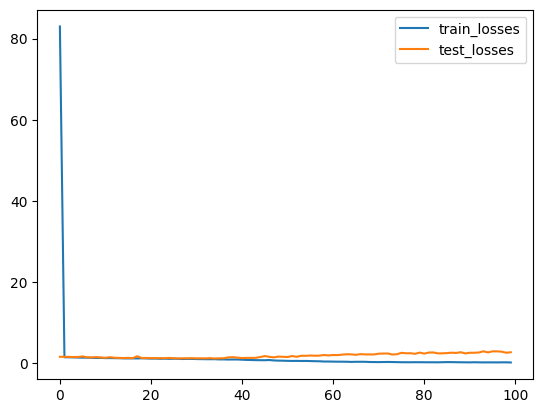

In [12]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

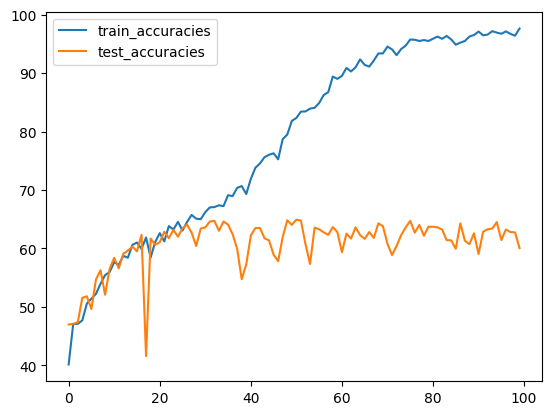

In [13]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracies')
plt.plot(test_accuracies, label='test_accuracies')
plt.legend()

## PRE_FUNCTION


In [14]:
def train_epoch(model, optimizer, criterion, train_loader, device):
  model.train()
  accs, losses = [], []
  for idx,(inputs, labels) in enumerate(train_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    predictions = model(inputs)

    #compute loss
    loss = criterion(predictions,labels)
    losses.append(loss.item())

    #backward
    loss.backward()
    optimizer.step()

    total_acc = (predictions.argmax(1) == labels).sum().item()
    acc = total_acc / labels.size(0)
    accs.append(acc)


  epoch_accuracy = sum(accs) / len(accs)
  epoch_loss = sum(losses) / len(losses)

  return epoch_accuracy, epoch_loss



def evaluate(model, criterion, valid_loader, device):
  model.eval()
  accs, losses = [],[]
  with torch.no_grad():
    for idx,(inputs,labels) in enumerate(valid_loader):
      inputs = inputs.to(device)
      labels = labels.to(device)

      predictions = model(inputs)

      loss = criterion(predictions,labels)

      losses.append(loss.item())

      total_acc = (predictions.argmax(1) == labels).sum().item()

      acc = total_acc / labels.size(0)
      accs.append(acc)

  epoch_acc = sum(accs) / len(accs)
  epoch_loss = sum(losses) / len(losses)

  return epoch_acc, epoch_loss


def train(model, name_model, save_model, optimizer , criterion, train_dataloader, valid_dataloader, num_epochs, device):
  train_accs, train_losses = [], []
  eval_accs, eval_losses = [], []
  best_loss_eval = 100
  for epoch in range(num_epochs):
    train_acc, train_loss = train_epoch(model,optimizer,criterion,train_dataloader,device)

    train_accs.append(train_acc)
    train_losses.append(train_loss)

    eval_acc, eval_loss = evaluate(model,criterion,valid_dataloader,device)

    eval_accs.append(eval_acc)
    eval_losses.append(eval_loss)

    if eval_loss < best_loss_eval:
      best_loss_eval = eval_loss
      torch.save(model.state_dict(),save_model + f'/{name_model}.pt')

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_acc:.2f}%, Test Loss: {eval_loss:.4f}, Test Accuracy: {eval_acc:.2f}%")



  model.load_state_dict(torch.load(save_model + f'/{name_model}.pt'))
  model.eval()
  metrics = {
      'train_acccuracy': train_accs,
      'train_loss': train_losses,
      'valid_accuracy': eval_accs,
      'valid_loss': eval_losses,
  }

  return model, metrics




## USING *Transfer_Learning*

In [15]:
transfer_model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

for param in transfer_model.parameters():
  param.requires_grad = False

in_features = transfer_model.fc.in_features

transfer_model.fc = nn.Linear(in_features,5)
transfer_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(transfer_model.parameters(),lr=0.001)
num_epochs = 50

save_model = '/model'
os.makedirs(save_model,exist_ok=True)
model_name = 'trainsfer_model'
transfer_model, base_metrics = train(
    transfer_model, model_name, save_model, optimizer, criterion, train_loader,valid_loader,num_epochs,device
)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 126MB/s]


Epoch [1/50], Loss: 1.4405, Accuracy: 0.44%, Test Loss: 1.3947, Test Accuracy: 0.51%
Epoch [2/50], Loss: 1.2010, Accuracy: 0.55%, Test Loss: 1.2380, Test Accuracy: 0.54%
Epoch [3/50], Loss: 1.1417, Accuracy: 0.57%, Test Loss: 1.1590, Test Accuracy: 0.55%
Epoch [4/50], Loss: 1.0869, Accuracy: 0.59%, Test Loss: 1.1221, Test Accuracy: 0.57%
Epoch [5/50], Loss: 1.0500, Accuracy: 0.60%, Test Loss: 1.0773, Test Accuracy: 0.58%
Epoch [6/50], Loss: 1.0304, Accuracy: 0.61%, Test Loss: 1.0758, Test Accuracy: 0.59%
Epoch [7/50], Loss: 1.0254, Accuracy: 0.61%, Test Loss: 1.0585, Test Accuracy: 0.59%
Epoch [8/50], Loss: 0.9928, Accuracy: 0.63%, Test Loss: 1.0378, Test Accuracy: 0.60%
Epoch [9/50], Loss: 0.9945, Accuracy: 0.62%, Test Loss: 1.0306, Test Accuracy: 0.60%
Epoch [10/50], Loss: 0.9827, Accuracy: 0.63%, Test Loss: 1.0179, Test Accuracy: 0.61%
Epoch [11/50], Loss: 0.9617, Accuracy: 0.63%, Test Loss: 1.0023, Test Accuracy: 0.63%
Epoch [12/50], Loss: 0.9715, Accuracy: 0.63%, Test Loss: 1.0230

In [16]:
fine_tuning_model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

num_freeze = 40

for idx,param in enumerate(fine_tuning_model.parameters()):
  if idx < num_freeze:
    param.requires_grad = False

in_features = fine_tuning_model.fc.in_features
fine_tuning_model.fc = nn.Linear(in_features,5)

fine_tuning_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fine_tuning_model.parameters(),lr=0.005)
num_epochs = 50

save_model = '/model'
os.makedirs(save_model,exist_ok=True)
model_name = 'fine_tuning_model'
fine_tuning_model, base_metrics = train(
    fine_tuning_model, model_name, save_model, optimizer, criterion, train_loader,valid_loader,num_epochs,device
)

Epoch [1/50], Loss: 1.3918, Accuracy: 0.56%, Test Loss: 2.0579, Test Accuracy: 0.63%
Epoch [2/50], Loss: 0.8928, Accuracy: 0.66%, Test Loss: 0.8781, Test Accuracy: 0.68%
Epoch [3/50], Loss: 0.8359, Accuracy: 0.69%, Test Loss: 0.8140, Test Accuracy: 0.70%
Epoch [4/50], Loss: 0.7326, Accuracy: 0.73%, Test Loss: 0.8407, Test Accuracy: 0.72%
Epoch [5/50], Loss: 0.6847, Accuracy: 0.75%, Test Loss: 0.9274, Test Accuracy: 0.65%
Epoch [6/50], Loss: 0.6917, Accuracy: 0.75%, Test Loss: 0.9363, Test Accuracy: 0.69%
Epoch [7/50], Loss: 0.6312, Accuracy: 0.77%, Test Loss: 0.8094, Test Accuracy: 0.73%
Epoch [8/50], Loss: 0.5882, Accuracy: 0.79%, Test Loss: 0.8502, Test Accuracy: 0.72%
Epoch [9/50], Loss: 0.5402, Accuracy: 0.80%, Test Loss: 0.8078, Test Accuracy: 0.72%
Epoch [10/50], Loss: 0.5374, Accuracy: 0.81%, Test Loss: 0.8410, Test Accuracy: 0.72%
Epoch [11/50], Loss: 0.5014, Accuracy: 0.82%, Test Loss: 0.8159, Test Accuracy: 0.75%
Epoch [12/50], Loss: 0.4363, Accuracy: 0.84%, Test Loss: 0.8387

In [17]:
initialized_model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)


in_features = initialized_model.fc.in_features
initialized_model.fc = nn.Linear(in_features,5)

initialized_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(initialized_model.parameters(),lr=0.001)
num_epochs = 50

save_model = '/model'
os.makedirs(save_model,exist_ok=True)
model_name = 'initialized_model'
initialized_model, base_metrics = train(
    initialized_model, model_name, save_model, optimizer, criterion, train_loader,valid_loader,num_epochs,device
)

Epoch [1/50], Loss: 1.1009, Accuracy: 0.60%, Test Loss: 2.7775, Test Accuracy: 0.47%
Epoch [2/50], Loss: 0.7704, Accuracy: 0.72%, Test Loss: 0.9146, Test Accuracy: 0.69%
Epoch [3/50], Loss: 0.6322, Accuracy: 0.77%, Test Loss: 0.8692, Test Accuracy: 0.71%
Epoch [4/50], Loss: 0.5811, Accuracy: 0.78%, Test Loss: 0.8268, Test Accuracy: 0.71%
Epoch [5/50], Loss: 0.5450, Accuracy: 0.80%, Test Loss: 0.9079, Test Accuracy: 0.69%
Epoch [6/50], Loss: 0.4961, Accuracy: 0.83%, Test Loss: 0.8674, Test Accuracy: 0.69%
Epoch [7/50], Loss: 0.4492, Accuracy: 0.84%, Test Loss: 1.9431, Test Accuracy: 0.47%
Epoch [8/50], Loss: 0.4437, Accuracy: 0.84%, Test Loss: 1.3017, Test Accuracy: 0.69%
Epoch [9/50], Loss: 0.3973, Accuracy: 0.86%, Test Loss: 0.7464, Test Accuracy: 0.74%
Epoch [10/50], Loss: 0.3562, Accuracy: 0.87%, Test Loss: 0.8382, Test Accuracy: 0.74%
Epoch [11/50], Loss: 0.3749, Accuracy: 0.86%, Test Loss: 0.8504, Test Accuracy: 0.76%
Epoch [12/50], Loss: 0.3533, Accuracy: 0.87%, Test Loss: 0.8769